## Machine Learning Coursera
Exercise 1.2 : Linear Regression with multiple variables

This exercise is all about prediction of price of house over the given data of no of bedrooms and size of the house. So our job is to predict the price of the house for a given no of bedrooms and the size of house.

### Initialization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## ================== *Plotting* ===================

In [2]:
import os
data = pd.read_csv('ex1data2.txt', header=None, names=['Size of house', 'No of Bedrooms', 'Price'])

In [3]:
print(data.shape)
data.head()

(47, 3)


,Size of house,No of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


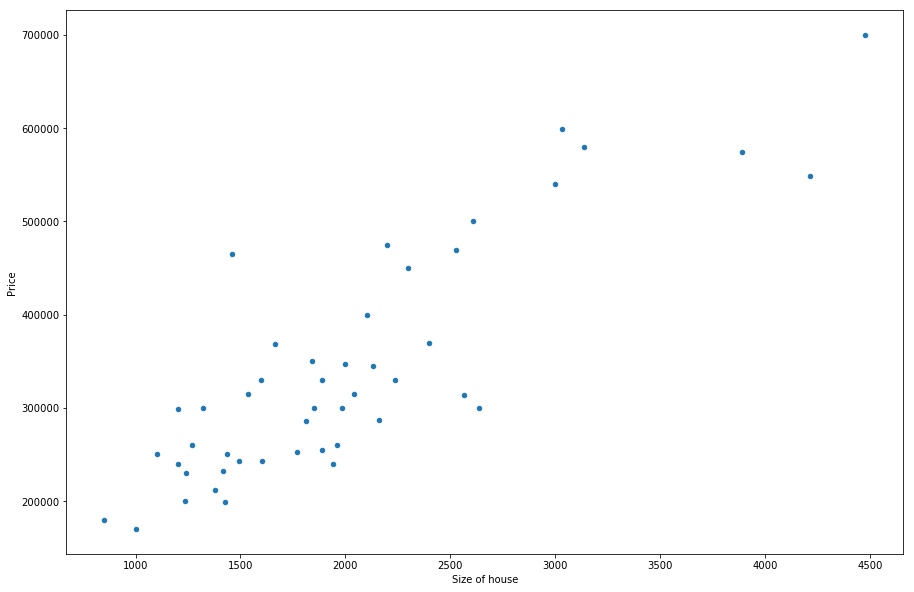

In [4]:
data.plot(kind='scatter', x='Size of house', y='Price', figsize=(15,10))

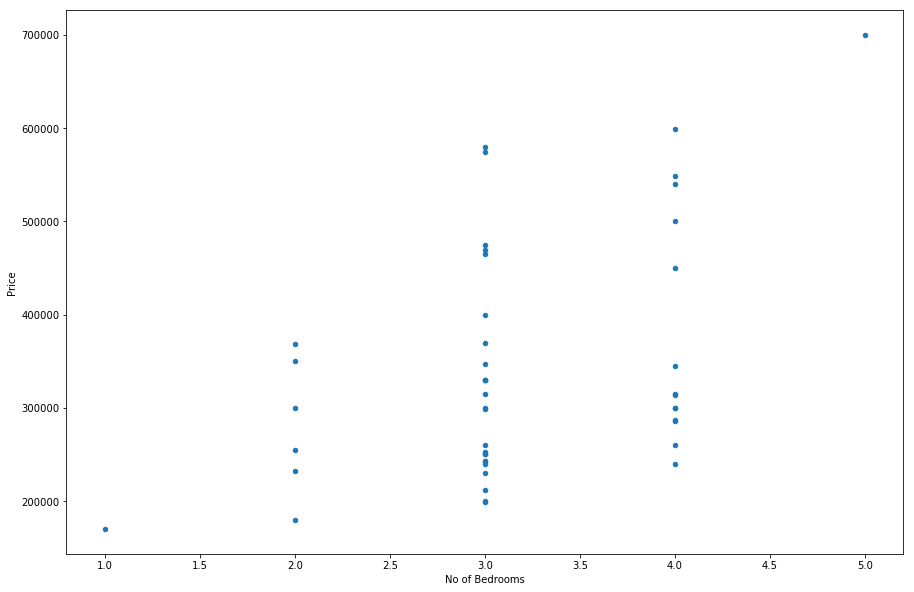

In [5]:
data.plot(kind='scatter', x='No of Bedrooms', y='Price', figsize=(15,10))

we need to normalize the given data for the better results, we can do this by pandas library.
## ================== Feature Scaling ===================

In [6]:
row, cols = data.shape
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.head()

,Size of house,No of Bedrooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [7]:
y.head()

,Price
0,399900
1,329900
2,369000
3,232000
4,539900


In [8]:
global mean, std

In [9]:
def featureScaling(X, m):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X = (X-mean)/std
    X = np.append(np.ones((m,1)), X,axis = 1)
    return (X,mean,std)

In [10]:
X, mean, std = featureScaling(X, row)

## =================== *Compute Cost* ==================
Adding Ones column to the data matrix using pandas.DataFrame.insert(loc, column, value, allow_duplicates=False) at specified location.Basically this is for the vectorization

In [11]:
y.head()

,Price
0,399900
1,329900
2,369000
3,232000
4,539900


X and y are having the data type of object type, so they need to be converted into matrix.<br>Method <span style="color:RED"> numpy.matrix </span> Returns a matrix from an array-like object, or from a string of data.

In [12]:
X = np.matrix(X)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))   #currently theta is initialized as zero matrix as there are 3 columns in X
print(X.shape,y.shape)

(47, 3) (47, 1)


Now we need to compute the cost for the theta.So Defining the computeCost.

In [13]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Calling the computeCost method to calculate the cost.

In [14]:
computeCost(X, y, theta)

65591548106.457443

This is the initial cost which is obviously very high.So from here we have to define a function to perform gradientDescent to minimize the cost.

## ================= *Gradient Descent* ================

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Now we have to set the learning rate alpha and the no of iterations.

In [16]:
alpha = 0.01
iters = 1500

After setting the values, now we have to call the *gradientDescent* method to fit our parameters in the training set and plot the cost function over no of iterations.

In [17]:
theta_new, cost = gradientDescent(X, y, theta, alpha, iters)
print(theta_new)

[[ 340412.56301439  109370.05670466   -6500.61509507]]


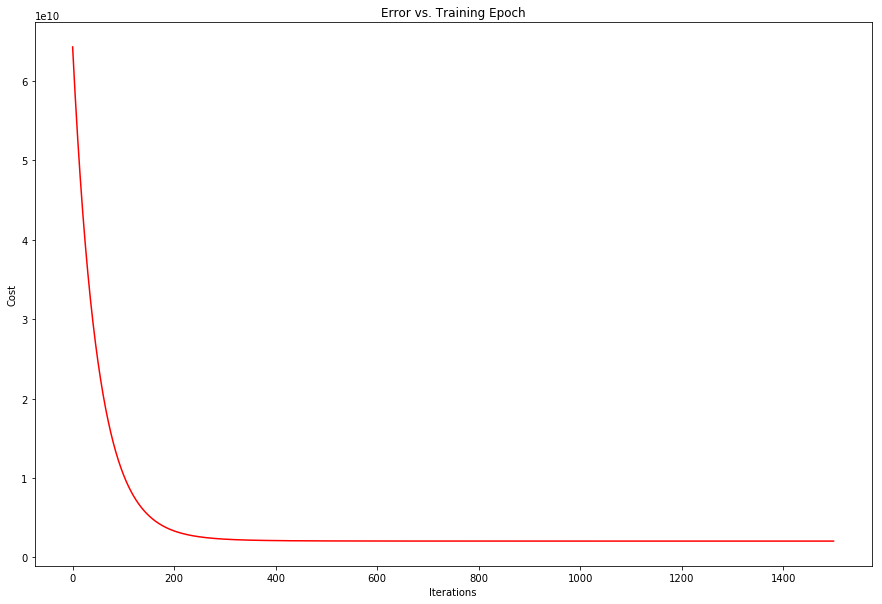

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [19]:
computeCost(X, y, theta_new)

2043282709.9327548

## ================= *Prediction* ================

In [20]:
flag = True
while flag :
    size = int(input("Program paused. Enter the size of house in sq-ft:"))
    br = int(input("Program paused. Enter the no of bedrooms:"))
    if size > 0 and br > 0:
        flag = False
        normalized_specs = (np.array([size,br]) - mean) / std
        normalized_specs = np.append(np.ones((1)), normalized_specs,axis = 0)
        price = float(np.dot(theta_new, normalized_specs))
        print("Predicted price of house with size %d and %d no of bedrooms (using gradient descent):\n $%.3f" %(size, br, price))
    else :
        print("Size of house or no of bedrooms never be -ve or zero")

Program paused. Enter the size of house in sq-ft:1650
Program paused. Enter the no of bedrooms:3
Predicted price of house with size 1650 and 3 no of bedrooms (using gradient descent):
 $293098.467
